<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Table of Contents</a></span></li><li><span><a href="#2.1.-Numpy-ndarray---создание" data-toc-modified-id="2.1.-Numpy-ndarray---создание-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2.1. Numpy ndarray - создание</a></span></li><li><span><a href="#2.2.-Numpy-ndarray---индексы" data-toc-modified-id="2.2.-Numpy-ndarray---индексы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>2.2. Numpy ndarray - индексы</a></span><ul class="toc-item"><li><span><a href="#TLDR:" data-toc-modified-id="TLDR:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>TLDR:</a></span></li></ul></li><li><span><a href="#2.3.-Numpy-ndarray---элементарные-операции-с-массивами" data-toc-modified-id="2.3.-Numpy-ndarray---элементарные-операции-с-массивами-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>2.3. Numpy ndarray - элементарные операции с массивами</a></span><ul class="toc-item"><li><span><a href="#TLDR:" data-toc-modified-id="TLDR:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>TLDR:</a></span></li></ul></li><li><span><a href="#2.4.-Numpy---основные-функции." data-toc-modified-id="2.4.-Numpy---основные-функции.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>2.4. Numpy - основные функции.</a></span><ul class="toc-item"><li><span><a href="#TLDR:" data-toc-modified-id="TLDR:-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>TLDR:</a></span></li></ul></li><li><span><a href="#2.5.-Numpy---I/O." data-toc-modified-id="2.5.-Numpy---I/O.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>2.5. Numpy - I/O.</a></span></li></ul></div>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# 2.1. Numpy ndarray - создание

Numpy - пакет для векторизованных вычислений в Python'e. Основной объект в numpy - nddarray, который располагается напрерывно в памяти и позволяет производить быстрые вычисления (конструктор для ndarray - array, так как последний не является массивом, то мы будем использовать array и ndarray как синонимы без всякого риска).

В чем преимущества массива в numpy перед списком в Питоне?

* статическая типизация и гомогенность;
* возможность компиляции функций, работающих со статистически типизированными объектами;
* как следствие, эффективное использование RAM и CPU;
* broadcasting (рассмотрим далее).

То, что элементы array расположены последовательно означает, что следовать за a[i] элементом массива в памяти будет элемент a[i+1]. Каждый элемент занимает, разумеется, itemsize байтов.

In [2]:
import numpy as np

In [3]:
a = np.array([1,2,3,4], dtype=np.int16)

In [4]:
a.shape

(4,)

Shape - кортеж, который указывает число элементов в каждом измерении. 

In [5]:
a = np.array([[1, 2], [3, 4]])

In [6]:
a.size

4

In [7]:
a.shape

(2, 2)

In [8]:
a.dtype

dtype('int64')

In [9]:
a.itemsize

8

In [10]:
a.nbytes

32

При желании, можно использовать np.size(np.object) и np.shape(np.object):

In [11]:
np.size(a)

4

In [12]:
np.shape(a)

(2, 2)

При необходимости, не стоит принебрегать встроенной справкой:

In [13]:
np.array?

Docstring:
array(object, dtype=None, copy=True, order='K', subok=False, ndmin=0)

Create an array.

Parameters
----------
object : array_like
    An array, any object exposing the array interface, an object whose
    __array__ method returns an array, or any (nested) sequence.
dtype : data-type, optional
    The desired data-type for the array.  If not given, then the type will
    be determined as the minimum type required to hold the objects in the
    sequence.  This argument can only be used to 'upcast' the array.  For
    downcasting, use the .astype(t) method.
copy : bool, optional
    If true (default), then the object is copied.  Otherwise, a copy will
    only be made if __array__ returns a copy, if obj is a nested sequence,
    or if a copy is needed to satisfy any of the other requirements
    (`dtype`, `order`, etc.).
order : {'K', 'A', 'C', 'F'}, optional
    Specify the memory layout of the array. If object is not an array, the
    newly created array will be in C order (

И специальными функциями numpy:

In [14]:
np.lookfor('create array')

Search results for 'create array'
---------------------------------
numpy.array
    Create an array.
numpy.memmap
    Create a memory-map to an array stored in a *binary* file on disk.
numpy.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.fromiter
    Create a new 1-dimensional array from an iterable object.
numpy.partition
    Return a partitioned copy of an array.
numpy.ctypeslib.as_array
    Create a numpy array from a ctypes array or POINTER.
numpy.ma.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.ma.make_mask
    Create a boolean mask from an array.
numpy.ctypeslib.as_ctypes
    Create and return a ctypes object from a numpy array.  Actually
numpy.ma.mrecords.fromarrays
    Creates a mrecarray from a (flat) list of masked arrays.
numpy.ma.mvoid.__new__
    Create a new masked array from scratch.
numpy.lib.format.open_memmap
    Open a .npy file as a memory-mapped array.
numpy.ma.MaskedArray.__new_

и IPython:

In [15]:
np.con*?

np.concatenate
np.conftest
np.conj
np.conjugate
np.convolve

Разумеется, произвольно присваивать значения элементам массива нельзя:

In [16]:
a[0,0] = "hello"

ValueError: invalid literal for int() with base 10: 'hello'

In [17]:
a[0,0] = 100

**Создание массивов**

Создавать из списков мы уже умеем:

In [18]:
np.array([1,2,3,4], dtype=np.int16)

array([1, 2, 3, 4], dtype=int16)

Разумеется, главное - чтобы объект, корый передается конструктору, поддерживал протокол итерации.

In [19]:
np.array((1,2,3,4), dtype=np.int16)

array([1, 2, 3, 4], dtype=int16)

In [20]:
np.arange(1,10,2)

array([1, 3, 5, 7, 9])

In [21]:
np.linspace(0, 1, 25)

array([0.        , 0.04166667, 0.08333333, 0.125     , 0.16666667,
       0.20833333, 0.25      , 0.29166667, 0.33333333, 0.375     ,
       0.41666667, 0.45833333, 0.5       , 0.54166667, 0.58333333,
       0.625     , 0.66666667, 0.70833333, 0.75      , 0.79166667,
       0.83333333, 0.875     , 0.91666667, 0.95833333, 1.        ])

In [22]:
np.logspace(0, 10, 10)

array([1.00000000e+00, 1.29154967e+01, 1.66810054e+02, 2.15443469e+03,
       2.78255940e+04, 3.59381366e+05, 4.64158883e+06, 5.99484250e+07,
       7.74263683e+08, 1.00000000e+10])

In [23]:
np.ones((3, 3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [24]:
np.zeros((3, 2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [25]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [26]:
np.diag(np.array([1, 2, 3, 4]))

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

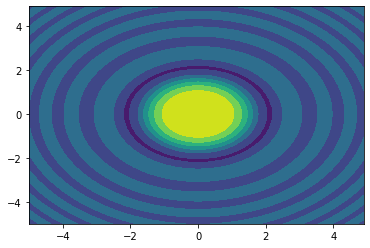

In [27]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
h = plt.contourf(x,y,z)

In [28]:
xx.shape

(1, 100)

In [29]:
yy.shape

(100, 1)

** Случайные массивы **

на интервале [0,1]:

In [30]:
np.random.rand(3,2)

array([[0.50755507, 0.0211933 ],
       [0.43352176, 0.44631306],
       [0.23881999, 0.83024573]])

Нормально распределенные:

In [31]:
np.random.randn(3,2)

array([[ 0.53942869,  1.52676162],
       [-3.2771929 , -1.84856065],
       [ 0.67212494, -1.49297925]])

-- N: иногда полезно получить случайное целое число:

In [32]:
np.random.randint(2,10)

6

# 2.2. Numpy ndarray - индексы

Отдельно рассмотрим 1-мерный и многомерные массивы.

In [36]:
np.random.rand(3,)[1]

0.8840405940159821

Для одномерного массива получим сразу элемент, который находится по данному индексу. Для n-мерного массива подобная индексация вернет массив размера n-1.

In [37]:
np.random.rand(3,5,10)[1].shape

(5, 10)

In [38]:
np.random.rand(3,5)[1].shape

(5,)

Можно использовать ':' вместо индекса:

In [39]:
A = np.random.rand(3,5)

In [40]:
A

array([[0.13177647, 0.92717986, 0.82779658, 0.39273167, 0.14057065],
       [0.05213634, 0.09272932, 0.88698963, 0.16815097, 0.36288661],
       [0.65428189, 0.60482195, 0.39499287, 0.3746054 , 0.06307277]])

In [41]:
A[0,:]

array([0.13177647, 0.92717986, 0.82779658, 0.39273167, 0.14057065])

In [42]:
A[:,0]

array([0.13177647, 0.05213634, 0.65428189])

Поддерживается стандартный протокол - python slicing syntax ([lower:upper:step]) :

In [43]:
A[0,:]

array([0.13177647, 0.92717986, 0.82779658, 0.39273167, 0.14057065])

In [44]:
A[0,:][0:4:2]

array([0.13177647, 0.82779658])

Операция slicing создает т.н. view - то есть данные не копируются, поэтому исходный объект по адресу - mutable.

In [45]:
A[0,:][0:4:2] = [1.0, 2.5]

In [46]:
A

array([[1.        , 0.92717986, 2.5       , 0.39273167, 0.14057065],
       [0.05213634, 0.09272932, 0.88698963, 0.16815097, 0.36288661],
       [0.65428189, 0.60482195, 0.39499287, 0.3746054 , 0.06307277]])

Параметры для slicing могут пропускаться:

In [47]:
A[0,:][0:4:2]

array([1. , 2.5])

In [48]:
A[0,:][0:4]

array([1.        , 0.92717986, 2.5       , 0.39273167])

In [49]:
A[0,:][:3]

array([1.        , 0.92717986, 2.5       ])

In [50]:
A[0,:][::-1]

array([0.14057065, 0.39273167, 2.5       , 0.92717986, 1.        ])

In [51]:
A[0,:][-3:]

array([2.5       , 0.39273167, 0.14057065])

** Fancy Indexing **

Этим термином обозначается индексирование с помощью массивов (или иных итерируемых конструкций).

In [52]:
row_indices = [1, 2]
A[row_indices]

array([[0.05213634, 0.09272932, 0.88698963, 0.16815097, 0.36288661],
       [0.65428189, 0.60482195, 0.39499287, 0.3746054 , 0.06307277]])

In [53]:
col_indices = [1, -1]
A[row_indices, col_indices]

array([0.09272932, 0.06307277])

Возможно Булево индексирование (**Boolean indexing**):

In [56]:
B = np.array([n for n in range(5)])
row_mask = np.array([True, False, True, False, False])
B[row_mask]

array([0, 2])

In [57]:
row_mask = np.array([1,0,1,0,0], dtype=bool)
B[row_mask]

array([0, 2])

Это очень удобно, как вы наверняка догадались, если мы хотим отобрать данные, отвечающие определенным условиям:

In [58]:
x = np.arange(0, 10, 0.5)
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [59]:
mask = (5 < x) * (x < 7.5)
mask

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False])

In [60]:
x[mask]

array([5.5, 6. , 6.5, 7. ])

Получить список индексов элементов, отвечающих заданной маске, можно с помощью **which**:

In [61]:
indices = np.where(mask)

indices

(array([11, 12, 13, 14]),)

In [62]:
x[indices]

array([5.5, 6. , 6.5, 7. ])

**take** еще одна конструкция выбора элементов массива:

In [63]:
v = np.arange(-3,3)
row_indices = [1, 3, 5]

In [64]:
v[row_indices]

array([-2,  0,  2])

In [65]:
v.take(row_indices)

array([-2,  0,  2])

In [66]:
np.take(v, row_indices)

array([-2,  0,  2])

** choices ** - полезная функция для выбора элеметов из нескольких массивов:

In [67]:
which = [1, 0, 1, 0]
choices = [[-1,-2,-3,-4], [1,2,3,4]]
np.choose(which, choices)

array([ 1, -2,  3, -4])

** compress ** - альтернативой Булевому индексированию:

In [68]:
a = np.array([[1, 2], [3, 4], [5, 6]])
np.compress([False, True, True], a, axis=0)

array([[3, 4],
       [5, 6]])

## TLDR:
* основной объект numpy - гомогенный массив фиксированного размера;
* для доступа к элементам массива пользуйтесь slicing и помните, что slicing создает view, а значит исходный массив может быть изменен.

# 2.3. Numpy ndarray - элементарные операции с массивами

** Broadcasting **

Концепеция broadcasting является ключевой для понимания операций с массивами. Обычно, операции с массивами производятся поэлементно. 

In [69]:
a = np.array([1.0,2.0,3.0])
b = np.array([2.0,2.0,2.0])

In [70]:
a * b

array([2., 4., 6.])

Что, если массивы разного размера? Начнем с простого - скаляр и вектор:

In [71]:
a = np.array([1.0,2.0,3.0])
b = 2.0
a * b

array([2., 4., 6.])

Все просто - скаляр словно "вырастает" (broadcasted) до размеров вектора и производится поэлементная операция (разумеется, это умозрительная аналогия - новый вектор из 2 не создается!).

Общее правило таково:

операция может произведена если размерность "крайних" осей массивов совпадает (trailing dimension), либо один из элементов является скаляром.

Пример из оффициальной документации:

In [72]:
'''

Image  (3d array): 256 x 256 x 3
Scale  (1d array):             3
Result (3d array): 256 x 256 x 3

A      (4d array):  8 x 1 x 6 x 1
B      (3d array):      7 x 1 x 5
Result (4d array):  8 x 7 x 6 x 5

'''
pass

а вот эти операции дадут вам ошибку:

In [73]:
'''
A      (1d array):  3
B      (1d array):  4 # trailing dimensions do not match

A      (2d array):      2 x 1
B      (3d array):  8 x 4 x 3 # second from last dimensions mismatched
'''
pass

In [76]:
x = np.arange(4)
xx = x.reshape(4,1)
y = np.ones(5)
z = np.ones((3,4))

print(x.shape)

print(y.shape)

x + y

(4,)
(5,)


ValueError: operands could not be broadcast together with shapes (4,) (5,) 

In [77]:
print(xx.shape)
print(y.shape)
print((xx + y).shape)
print(xx + y)

print('-------')

print(x.shape)
print(z.shape)
print((x + z).shape)
print(x + z)

(4, 1)
(5,)
(4, 5)
[[1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4.]]
-------
(4,)
(3, 4)
(3, 4)
[[1. 2. 3. 4.]
 [1. 2. 3. 4.]
 [1. 2. 3. 4.]]


Классный пример из официальной документации:

In [78]:
a = np.array([0.0, 10.0, 20.0, 30.0])
b = np.array([1.0, 2.0, 3.0])
a[:, np.newaxis] + b

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

In [79]:
a[:, np.newaxis]

array([[ 0.],
       [10.],
       [20.],
       [30.]])

In [80]:
a[:, np.newaxis].shape

(4, 1)

** Операции вида "массив - скаляр" **

In [81]:
A

array([[1.        , 0.92717986, 2.5       , 0.39273167, 0.14057065],
       [0.05213634, 0.09272932, 0.88698963, 0.16815097, 0.36288661],
       [0.65428189, 0.60482195, 0.39499287, 0.3746054 , 0.06307277]])

In [82]:
A + 2

array([[3.        , 2.92717986, 4.5       , 2.39273167, 2.14057065],
       [2.05213634, 2.09272932, 2.88698963, 2.16815097, 2.36288661],
       [2.65428189, 2.60482195, 2.39499287, 2.3746054 , 2.06307277]])

** Операции вида "массив - массив" **

Производятся поэлементно с учетом правил broadcasting:

In [83]:
A * A

array([[1.00000000e+00, 8.59662500e-01, 6.25000000e+00, 1.54238161e-01,
        1.97601066e-02],
       [2.71819786e-03, 8.59872594e-03, 7.86750604e-01, 2.82747478e-02,
        1.31686693e-01],
       [4.28084786e-01, 3.65809595e-01, 1.56019369e-01, 1.40329206e-01,
        3.97817454e-03]])

In [84]:
A / A

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

** Матричные операции**

In [85]:
A = np.random.rand(3,3)

In [86]:
np.dot(A,A)

array([[1.01675947, 1.11143148, 0.44888226],
       [0.27700146, 0.89123085, 0.17775726],
       [0.54895285, 0.88380559, 0.71619077]])

In [87]:
v = np.random.randn(3)

In [88]:
np.dot(A,v)

array([-0.31470222, -0.23586502,  0.61532602])

In [89]:
np.dot(v,v)

1.1792960911016634

Если хочется использовать по умолчанию операции из матричной алгебры, то можно использовать конструктор matrix().

In [90]:
M = np.matrix(A)

In [91]:
v1 = np.matrix(v).T

In [92]:
M.shape

(3, 3)

In [93]:
v1.shape

(3, 1)

In [94]:
v1.T * v1

matrix([[1.17929609]])

In [95]:
M * v1

matrix([[-0.31470222],
        [-0.23586502],
        [ 0.61532602]])

** Преобразование массивов**

In [96]:
A.T

array([[0.42895903, 0.19436815, 0.90212882],
       [0.71972093, 0.86287077, 0.23654588],
       [0.76803089, 0.02872195, 0.12858426]])

In [97]:
C = np.matrix([[1j, 2j], [3j, 4j]])

In [98]:
np.conjugate(C)

matrix([[0.-1.j, 0.-2.j],
        [0.-3.j, 0.-4.j]])

Эрмитово сопряжение:

In [99]:
C.H

matrix([[0.-1.j, 0.-3.j],
        [0.-2.j, 0.-4.j]])

In [100]:
np.real(C)

matrix([[0., 0.],
        [0., 0.]])

In [101]:
np.imag(C)

matrix([[1., 2.],
        [3., 4.]])

** reshape **

In [102]:
a

array([ 0., 10., 20., 30.])

In [103]:
a = a.reshape((2, 2))

In [104]:
a

array([[ 0., 10.],
       [20., 30.]])

** resize **

In [105]:
a = np.arange(4)

In [106]:
a.resize((8,))

In [107]:
a

array([0, 1, 2, 3, 0, 0, 0, 0])

** repeat **

In [108]:
a = np.array([[1, 2], [3, 4]])
np.repeat(a, 3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [109]:
np.tile(a, 3)

array([[1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4]])

** concatenate **

In [110]:
a

array([[1, 2],
       [3, 4]])

In [111]:
b = np.array([[5, 6]])

In [112]:
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [113]:
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

Что касается параметра axis, то иллюстрировать его использование можно следующим образом:

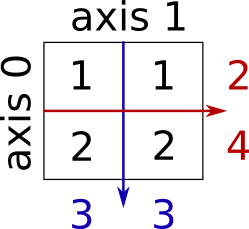

In [114]:
from IPython.display import Image
Image(filename='axis.png')

** hstack **

Название говорит само за себя - horizontal stack.

In [115]:
np.hstack((a,b.T))

array([[1, 2, 5],
       [3, 4, 6]])

In [116]:
a.shape

(2, 2)

In [117]:
b.T.shape

(2, 1)

** vstack **

In [118]:
np.vstack((a,b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [119]:
a.shape

(2, 2)

In [120]:
b.shape

(1, 2)

** Копии и view **

Мы помним, что очень важно различать копирование объекта и присваивание новой ссылки на объект. Numpy в этом смысле не отличается от списков:

In [121]:
A = np.array([[1, 2], [3, 4]])

In [122]:
B = A

In [123]:
B[0,0] = 10

In [124]:
A

array([[10,  2],
       [ 3,  4]])

Если это не тот тип поведения, который нам нужен - следует использовать np.copy():

In [125]:
B = np.copy(A)

In [126]:
B[0,0] = 100

In [127]:
A

array([[10,  2],
       [ 3,  4]])

Важно помнить, что если вы используете view массива, то копии вы не создаете!

In [128]:
a = np.arange(10)

In [129]:
b = a[::2]

In [130]:
np.may_share_memory(a, b)

True

In [131]:
c = a[::2].copy()
np.may_share_memory(a, c)

False

In [132]:
d = a.T
np.may_share_memory(a, d)

True

Как следствие - никогда не делайте так:

In [133]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [134]:
a += a.T

In [135]:
a

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

## TLDR:
* следует отличать копию массива и view;
* при осуществлении операций помните про правила broadcasting;
* запомните hstack и vstack.

# 2.4. Numpy - основные функции.

** Встроенные функции массива **

In [136]:
m = np.random.rand(3,3)

In [137]:
m.sum()

4.016720949272684

In [138]:
m.max()

0.9883497629555019

** Всегда используйте встроенные функции! **

In [139]:
a = np.random.rand(100000)

In [142]:
%timeit -n 1000 max(a)

9.35 ms ± 1.27 ms per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [143]:
%timeit -n 1000 a.max()

34.6 µs ± 1.94 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [144]:
%timeit -n 1000 sum(a)

15.8 ms ± 576 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [145]:
%timeit -n 1000 a.sum()

28 µs ± 783 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Просто считать сумму элементов матрицы или находить максимальный элемент не так интересно, и тут нам помогают axis:

In [146]:
m

array([[0.23997119, 0.53578755, 0.27146694],
       [0.03443087, 0.62708559, 0.52020046],
       [0.04195581, 0.75747277, 0.98834976]])

In [147]:
m.sum(axis=0)

array([0.31635788, 1.92034591, 1.78001716])

In [148]:
m.sum(axis=1)

array([1.04722568, 1.18171693, 1.78777835])

In [149]:
m.max(axis=0)

array([0.23997119, 0.75747277, 0.98834976])

Очень полезно произведение всех элементов:

In [150]:
m.prod(axis=1)

array([0.03490347, 0.0112317 , 0.03141014])

Кумулятивная сумма элементов:

In [151]:
a.cumsum() * 100

array([8.01400958e+01, 1.14538204e+02, 1.48077329e+02, ...,
       5.00034301e+06, 5.00039826e+06, 5.00041669e+06])

Кумулятивное произведение:

In [152]:
a.cumprod()

array([0.80140096, 0.27566677, 0.09245622, ..., 0.        , 0.        ,
       0.        ])

**Простые статистики**

**Среднее**

In [153]:
m.mean(axis=0)

array([0.10545263, 0.6401153 , 0.59333905])

In [154]:
np.mean(m, axis=0)

array([0.10545263, 0.6401153 , 0.59333905])

In [155]:
np.mean(a)

0.5000416689234926

In [156]:
a.mean()

0.5000416689234926

**Медиана**

In [157]:
np.median(m, axis=0)

array([0.04195581, 0.62708559, 0.52020046])

In [158]:
np.median(a)

0.4995921389659629

** Дисперсия **

In [159]:
np.std(m, axis=0)

array([0.09516858, 0.09097038, 0.29720048])

In [160]:
m.std(axis=0)

array([0.09516858, 0.09097038, 0.29720048])

In [161]:
np.var(a)

0.08333535592603782

In [162]:
a.var()

0.08333535592603782

** Сортировка **

In [163]:
np.sort(a)

array([2.80374084e-06, 2.59103536e-05, 4.30852707e-05, ...,
       9.99993295e-01, 9.99996412e-01, 9.99999120e-01])

Функция выше возвращает отсортированную копию массива. Если нужна сортировка in-place:

In [164]:
a.sort()

In [165]:
a = np.random.rand(100000)

Также иногда бывает полезно получить только список индексов в правильном порядке:

In [166]:
np.argsort(a)

array([83846, 76906, 81804, ..., 38255,  4830,  4090])

In [167]:
np.argmax(a)

4090

In [168]:
np.argmin(a)

83846

In [169]:
np.nonzero(a)

(array([    0,     1,     2, ..., 99997, 99998, 99999]),)

** Функции для работы с матрицами **

In [170]:
m

array([[0.23997119, 0.53578755, 0.27146694],
       [0.03443087, 0.62708559, 0.52020046],
       [0.04195581, 0.75747277, 0.98834976]])

In [171]:
np.diag(m)

array([0.23997119, 0.62708559, 0.98834976])

In [172]:
m.diagonal()

array([0.23997119, 0.62708559, 0.98834976])

Для целого класса функций из линейной алгебры есть свой суб-модуль np.linalg.

http://docs.scipy.org/doc/numpy/reference/routines.linalg.html

In [173]:
MM = np.random.randn(9, 6)

In [174]:
U, s, V = np.linalg.svd(MM, full_matrices=False)
U.shape, V.shape, s.shape

((9, 6), (6, 6), (6,))

In [175]:
S = np.diag(s)
np.allclose(MM, np.dot(U, np.dot(S, V)))

True

** Векторизация кода **

В numpy есть встроенная функция vectorize, которая "автоматически" векторизует вашу функцию:

In [176]:
def heavyside(x):
    if x >= 0:
        return 1
    else:
        return 0

In [177]:
heavyside(np.array([-3,-2,-1,0,1,2,3]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [178]:
heavyside_vec = np.vectorize(heavyside)

In [179]:
heavyside_vec(np.array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

Тем не менее, лучше сразу пишите так:

In [180]:
def heavyside(x):
    return 1 * (x >= 0)

In [181]:
heavyside(np.array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

In [182]:
np.array([-3,-2,-1,0,1,2,3]) >= 0

array([False, False, False,  True,  True,  True,  True])

In [183]:
1 * (np.array([-3,-2,-1,0,1,2,3]) >= 0)

array([0, 0, 0, 1, 1, 1, 1])

** Условные выражения **

Как вы уже поняли, для вектора конструкция типа if (vector) не подходит.

In [184]:
if (M > 5).any():
    print("at least one element in M is larger than 5")
else:
    print("no element in M is larger than 5")

no element in M is larger than 5


In [185]:
if (M > 5).all():
    print("all elements in M are larger than 5")
else:
    print("all elements in M are not larger than 5")

all elements in M are not larger than 5


## TLDR:
- всегда используйте встроенные в np функции;
- векторизуйте везде, где это возможно!

# 2.5. Numpy - I/O.

В данном случае у нас на выбор 2 опции - либо формат numpy, либо просто текстовый файл.

In [186]:
np.save("random.npy", M)

In [187]:
np.load("random.npy")

array([[0.42895903, 0.71972093, 0.76803089],
       [0.19436815, 0.86287077, 0.02872195],
       [0.90212882, 0.23654588, 0.12858426]])

In [188]:
np.savetxt('random.csv', M, delimiter='\t')

In [189]:
! cat random.csv

4.289590278321618877e-01	7.197209260539167985e-01	7.680308900379784198e-01
1.943681456814491115e-01	8.628707690920991435e-01	2.872195327971382994e-02
9.021288166624715776e-01	2.365458799233632892e-01	1.285842607309632957e-01


In [190]:
np.loadtxt('random.csv')

array([[0.42895903, 0.71972093, 0.76803089],
       [0.19436815, 0.86287077, 0.02872195],
       [0.90212882, 0.23654588, 0.12858426]])